#  Polynomial Regression


Given an input $x\in\mathbb{R}$, we can create other features such as $x^2$, $x^3$ ... $x^p$, etc.

We can fit a polynomial of degree $p$ to the data:

$$f(x) = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + ... + \beta_p x^p$$

This is sometimes called a polynomial regression, but it is still a linear regression: as we are seeking a linear combination of the polynomial features. The design matrix is:

$$X = \begin{bmatrix} 1 & x_1 & x_1^2 & x_1^3 & ... & x_1^p \\ 1 & x_2 & x_2^2 & x_2^3 & ... & x_2^p \\ ... & ... & ... & ... & ... & ... \\ 1 & x_N & x_N^2 & x_N^3 & ... & x_N^p \end{bmatrix}$$



## Interpolation

Note that if we have $(x_0, y_0)$, $(x_1, y_1)$, ..., $(x_n, y_n)$, and the $x_i$'s are different, then there is always a polynomial of degree $n$ that passes through all the points. 
In this case, the design matrix is a square invertible matrix, and therefore $X\beta = y$ has a unique solution.

An alternative way to see this is that, when $n = p$, we have $n+1$ equations and $n+1$ unknowns, and we can solve for the coefficients $\beta_0, \beta_1, \beta_2, ..., \beta_p$.

$$
\begin{align*}
f(x_0) & = \beta_0 + \beta_1 x_0 + \beta_2 x_0^2 + ... + \beta_p x_0^p = y_0 \\
f(x_1) & = \beta_0 + \beta_1 x_1 + \beta_2 x_1^2 + ... + \beta_p x_1^p = y_1 \\
f(x_2) & = \beta_0 + \beta_1 x_2 + \beta_2 x_2^2 + ... + \beta_p x_2^p = y_2 \\
&... \\
f(x_n) &= \beta_0 + \beta_1 x_n + \beta_2 x_n^2 + ... + \beta_p x_n^p = y_n
\end{align*}
$$







In [18]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas as pd
# fix random seed for reproducibility
np.random.seed(7)


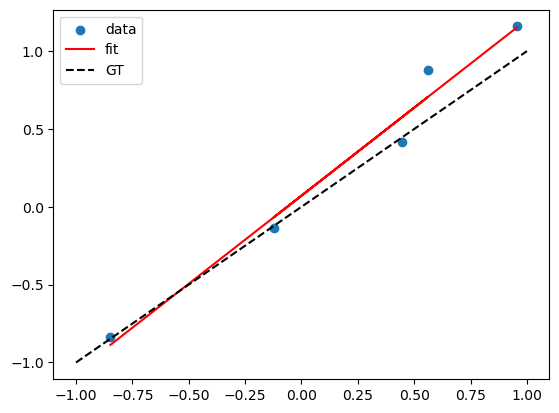

In [19]:
# Suppose the true model is a linear model of x

N = 5
X = np.random.uniform(-1,1,N)

# ground truth relation
f = lambda x: x

Y = f(X) + np.random.normal(0,0.1,N)

X = X.reshape(-1,1)
lreg_sklearn = linear_model.LinearRegression()
lreg_sklearn.fit(X,Y) 



plt.scatter(X,Y)
plt.plot(X, lreg_sklearn.predict(X), color='red')


x_grid = np.linspace(-1, 1, 100)
plt.plot(x_grid, f(x_grid), color='black', linestyle='--')

plt.legend(['data', 'fit', 'GT'])


[-1.1329286   6.40789176  3.50868941 -7.55811971] -0.36736931414942886


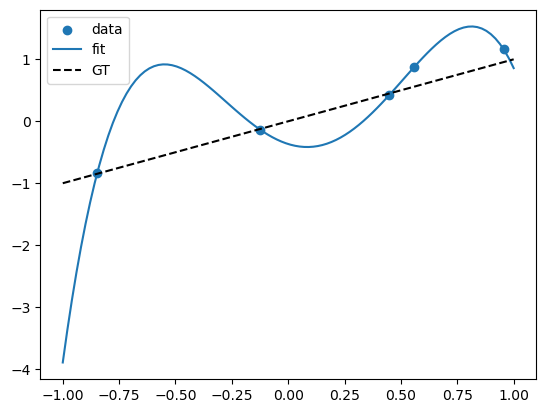

In [20]:
X_poly = np.hstack((X,X**2,X**3,X**4))
lreg_sklearn.fit(X_poly,Y) 
lreg_sklearn.score(X_poly,Y)


print(lreg_sklearn.coef_, lreg_sklearn.intercept_)
x_grid = np.linspace(-1,1,100) 
y_grid = lreg_sklearn.coef_[0]*x_grid + lreg_sklearn.coef_[1]*x_grid**2 + lreg_sklearn.coef_[2]*x_grid**3 + lreg_sklearn.coef_[3]*x_grid**4 + lreg_sklearn.intercept_
plt.scatter(X,Y)

# polynomial fit
plt.plot(x_grid, y_grid)

# dashed line for gt y = x
plt.plot(x_grid, f(x_grid), color='black', linestyle='--')

plt.legend(['data', 'fit', 'GT'])


## Overfitting and Generalization

A model that perfectly fits the training data might seem ideal, but it can be misleading. This is known as overfitting—the model is capturing noise instead of the true underlying pattern. As a result, it performs poorly on new, unseen data. Imagine a self-driving car that memorizes the exact layout of one city block—it might drive flawlessly there, but fail completely in a new neighborhood.

What we really want is generalization: the ability of a model to make accurate predictions on data it hasn’t seen before. To evaluate generalization, we split the data into a training set (to build the model) and a test set (to assess its performance on unseen data). A low training error with a high test error is a clear sign of overfitting.


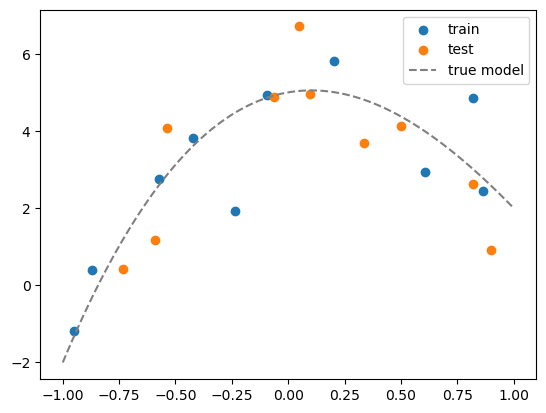

In [21]:
from sklearn.model_selection import train_test_split

# generate N data, this is the whole population
N = 20
x = np.random.uniform(-1,1,N)
Y = x + np.random.normal(0,0.1,N)
x = x.reshape(-1,1)


# maximum degree of the polynomial
degree = 7

# create a dataframe of all the polynomial features
X = np.hstack([x**i for i in range(degree+1)])

# convert to a pandas dataframe
df = pd.DataFrame(X, columns=['x%d'%i for i in range(degree+1)])
df.head()

# suppose the true model is a polynomial of degree 3
coeff = [5, 1, -5, 1]
df['y_true'] = sum([c*df[f'x{i}'] for i,c in enumerate(coeff)])

# add some noise to get data
df['y'] = df['y_true'] + np.random.normal(0,1,N)

# split the data into training and test sets 
df_train = df.iloc[:int(N/2)]
df_test = df.iloc[int(N/2):]

# visualize the data
plt.scatter(df_train['x1'], df_train['y'])
plt.scatter(df_test['x1'], df_test['y'])
# plot the true model
x_grid = np.linspace(-1,1,100)
y_grid = sum([c*x_grid**i for i,c in enumerate(coeff)])
plt.plot(x_grid, y_grid, color='gray', linestyle='--')
plt.legend(['train', 'test','true model'])

In [22]:
# For plotting, we need to create a grid of x values and its corresponding polynomial features
x_grid = np.linspace(-1,1,100).reshape(-1,1) 
X_grid = np.hstack([x_grid**i for i in range(degree+1)])
df_grid = pd.DataFrame(X_grid, columns=['x%d'%i for i in range(degree+1)])
df_grid.head()

x0        x1        x2        x3        x4        x5        x6        x7
0  1.0 -1.000000  1.000000 -1.000000  1.000000 -1.000000  1.000000 -1.000000
1  1.0 -0.979798  0.960004 -0.940610  0.921608 -0.902989  0.884747 -0.866874
2  1.0 -0.959596  0.920824 -0.883619  0.847918 -0.813658  0.780783 -0.749236
3  1.0 -0.939394  0.882461 -0.828978  0.778737 -0.731541  0.687205 -0.645557
4  1.0 -0.919192  0.844914 -0.776638  0.713879 -0.656192  0.603166 -0.554426

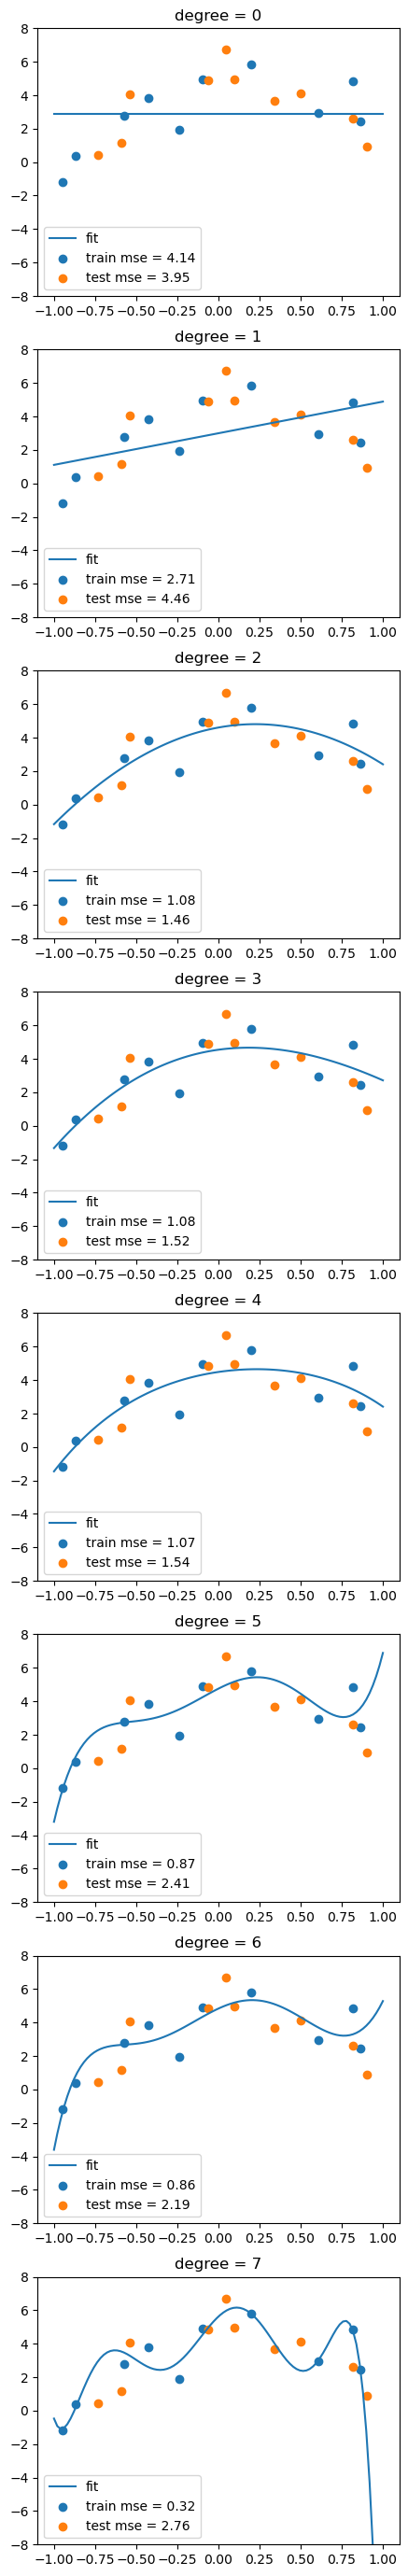

In [23]:
# for each degree, fit a polynomial model
from sklearn.metrics import mean_squared_error

# our features already include the constant term
lreg = linear_model.LinearRegression(fit_intercept=False)

train_mse = []
test_mse = []

fig, axs = plt.subplots(degree+1, 1, figsize=(5,degree*5))

# fit a polynomial model for each degree
for d in range(degree+1):

    # fit the model
    Xtrain_poly = df_train.iloc[:,:d+1]
    Xtest_poly = df_test.iloc[:,:d+1]
    
    lreg.fit(Xtrain_poly, df_train['y'])

    # calculate the MSE on training and test sets
    train_mse.append(mean_squared_error(df_train['y'], lreg.predict(Xtrain_poly)))
    test_mse.append(mean_squared_error(df_test['y'], lreg.predict(Xtest_poly)))

    # visualize the fit
    y_grid = lreg.predict(df_grid.iloc[:,:d+1])
    axs[d].plot(x_grid, y_grid)
    axs[d].scatter(df_train['x1'], df_train['y'])
    axs[d].scatter(df_test['x1'], df_test['y'])
    axs[d].set_title('degree = %d'%d)
    # show legend and MSE
    axs[d].legend(['fit', f'train mse = {train_mse[-1]:.2f}', f'test mse = {test_mse[-1]:.2f}'])
    axs[d].set_ylim(-8,8)


Text(0.5, 1.0, 'MSE on train and test sets for different degrees')

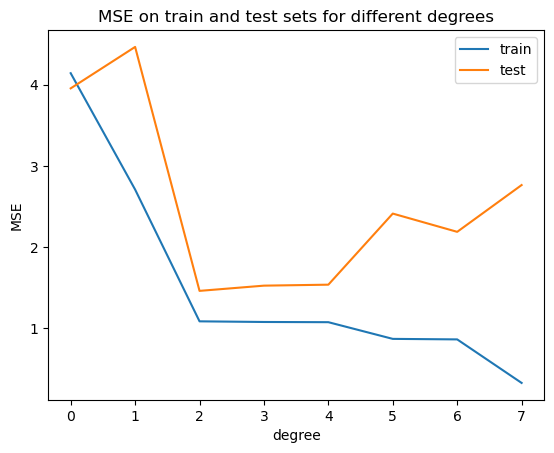

In [25]:
plt.plot(range(degree+1), train_mse)
plt.plot(range(degree+1), test_mse)
plt.legend(['train', 'test'])
plt.xticks(range(degree+1))
plt.xlabel('degree')
plt.ylabel('MSE')
plt.title('MSE on train and test sets for different degrees')